In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data.csv')
df_user = df.copy()
df_user.drop(columns=['id', 'name', 'artist'], inplace=True)

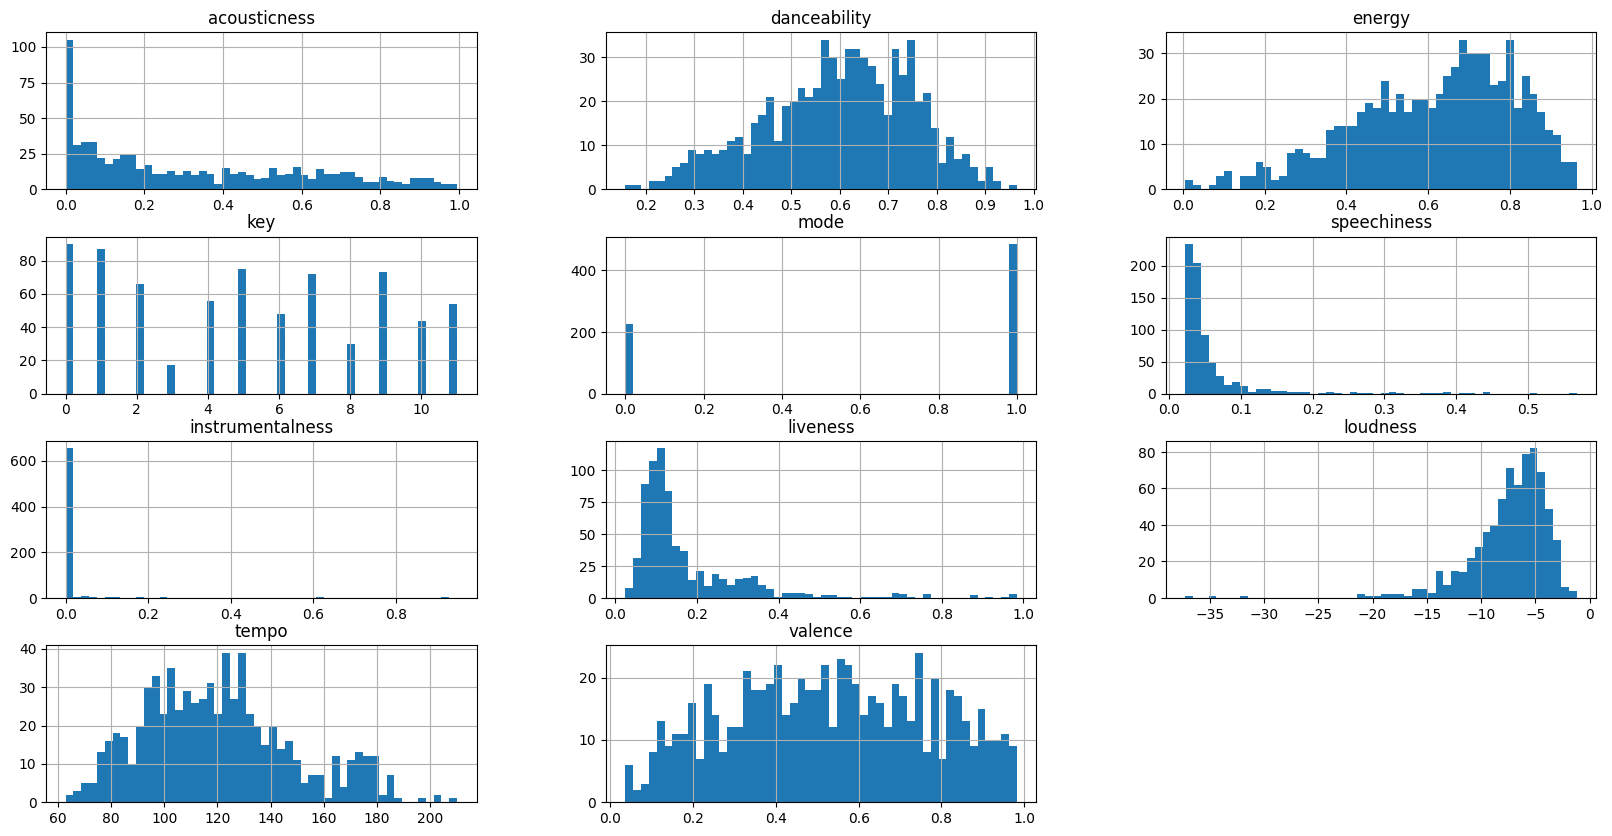

In [43]:
df_user[['acousticness', 'danceability', 'energy', 'key',
            'mode', 'speechiness',
           'instrumentalness','liveness','loudness',
           'tempo', 'valence']].hist(bins=50, figsize=(20,10))
plt.show()


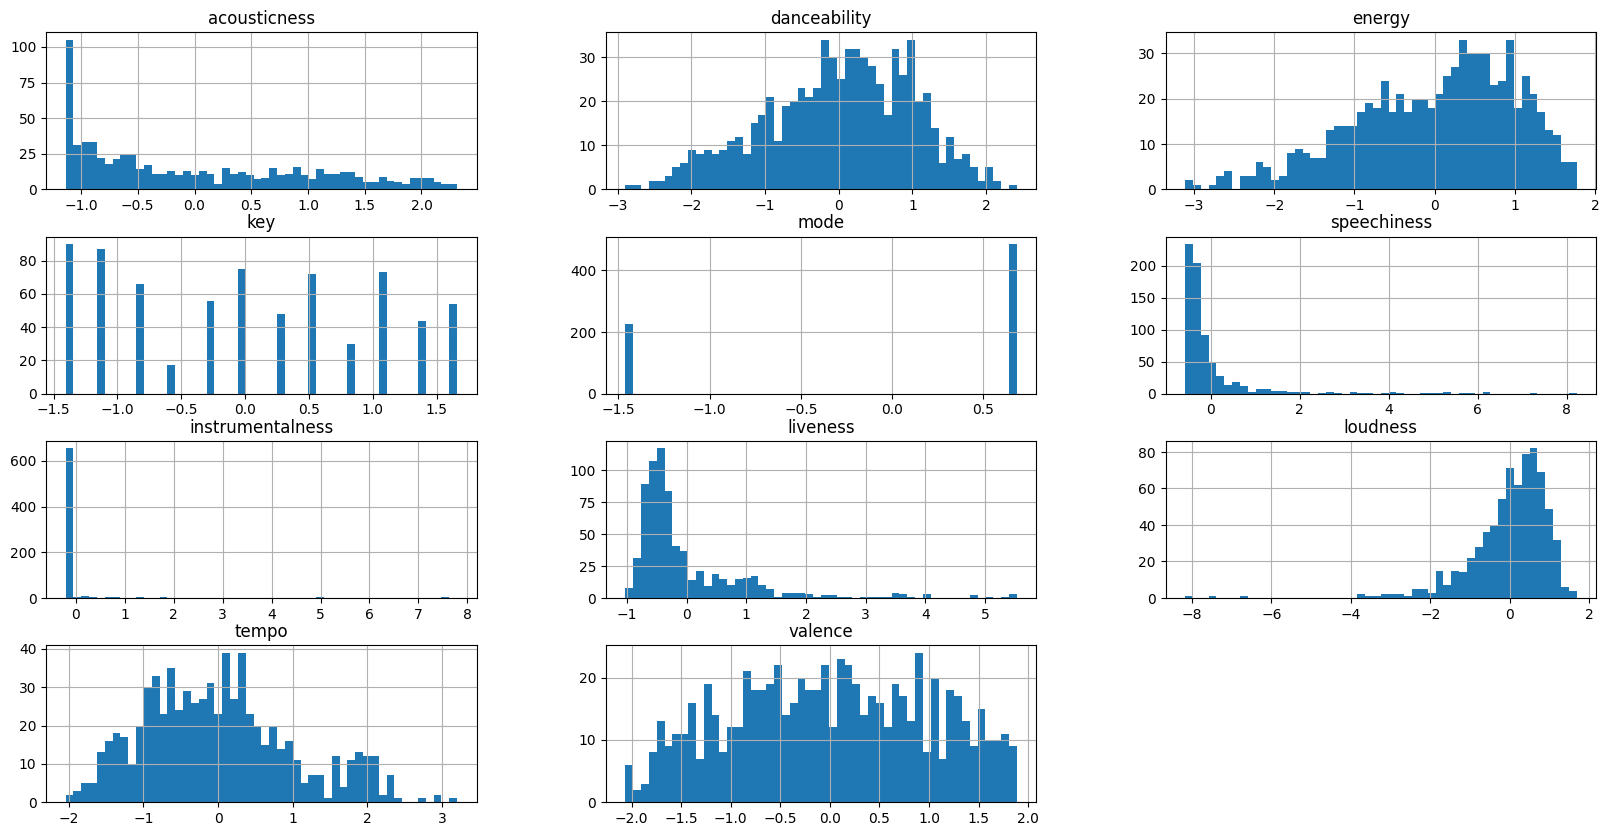

In [44]:
# Estandarización de valores
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

to_cluster = ['acousticness', 'danceability', 'energy', 'key',
            'mode', 'speechiness',
           'instrumentalness','liveness','loudness',
           'tempo', 'valence']

user_standard = ss.fit_transform(df_user[to_cluster])

# new dataframe
df_user_standard = pd.DataFrame(user_standard,columns=to_cluster)

# Poner estas columnas nuevamente en el dataframe
df_user_standard['artist'] = df['artist']
df_user_standard['name'] = df['name']

df_user_standard[['acousticness', 'danceability', 'energy', 'key',
            'mode', 'speechiness',
           'instrumentalness','liveness','loudness',
           'tempo', 'valence']].hist(bins=50, figsize=(20,10))

plt.show()


array([[<Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>],
       [<Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'speechiness'}>],
       [<Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'loudness'}>],
       [<Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'valence'}>, <Axes: >]], dtype=object)

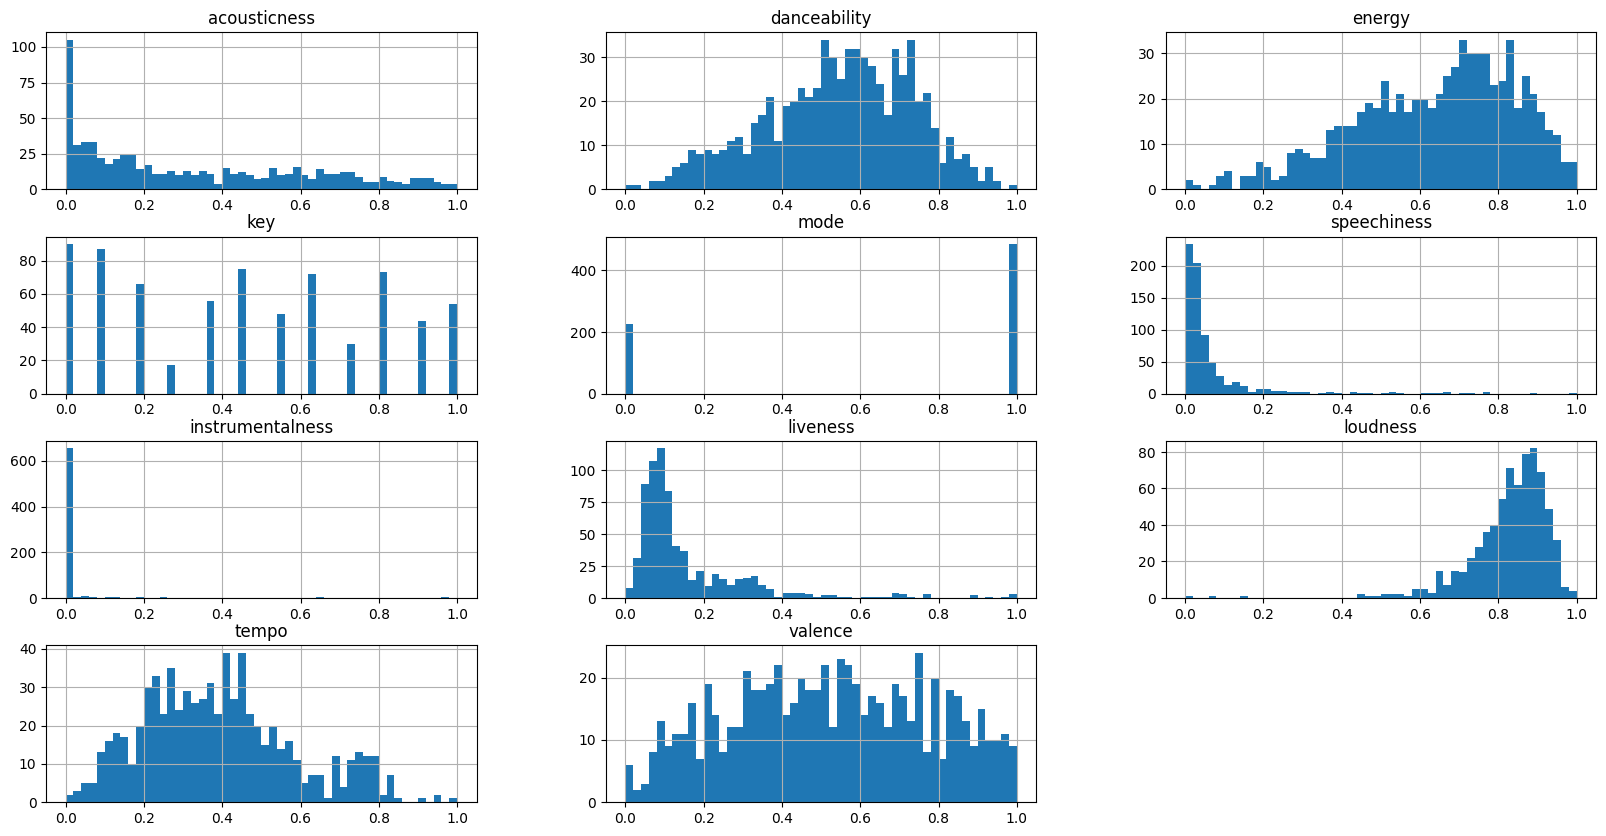

In [45]:
# Normalización de valores
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

to_cluster = ['acousticness', 'danceability', 'energy', 'key',
            'mode', 'speechiness',
           'instrumentalness','liveness','loudness',
           'tempo', 'valence']

user_normalized = mm.fit_transform(df_user[to_cluster])

# new dataframe
df_user_normalized = pd.DataFrame(user_normalized,columns=to_cluster)

# Poner estas columnas nuevamente en el dataframe
df_user_normalized['artist'] = df['artist']
df_user_normalized['name'] = df['name']

df_user_normalized[['acousticness', 'danceability', 'energy', 'key',
            'mode', 'speechiness',
           'instrumentalness','liveness','loudness',
           'tempo', 'valence']].hist(bins=50, figsize=(20,10))
#plt.show()

### Utilizando K-Nearest-Neighbor
Buscar el cluster más próximo y recomendar música de él.

In [46]:
from sklearn.neighbors import NearestNeighbors

## Datos estandarizados
model_knn = NearestNeighbors(n_neighbors = 5, metric = 'euclidean', algorithm='brute').fit(user_standard)

selected_song = df_user_standard[(df['name'] == 'The Less I Know The Better') & (df['artist'] == 'Tame Impala')]
selected_song_features = selected_song[['acousticness', 'danceability', 'energy', 'key',
            'mode', 'speechiness',
           'instrumentalness','liveness','loudness',
           'tempo', 'valence']].values
selected_song = ss.transform(selected_song_features)

distances, indices = model_knn.kneighbors(selected_song)
recommended_songs = df.iloc[indices[0]][['name', 'artist']].to_dict(orient = 'records')

for song, distance in zip(recommended_songs, distances[0]):
    print(f"{song['name']} by {song['artist']} - {distance}")


Avant Gardener by Courtney Barnett - 10.468321179870536
Lost Stars by Adam Levine - 10.471188912945143
El Paraíso by Los Mesoneros - 10.548089707093283
Me Voy by Julieta Venegas - 10.614792976371517
Smile by Lily Allen - 10.630457160254029


c:\Users\yop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [47]:
from sklearn.neighbors import NearestNeighbors

## Datos normalizados
model_knn = NearestNeighbors(n_neighbors = 5, metric = 'euclidean', algorithm='brute').fit(user_normalized)

selected_song = df_user_normalized[(df['name'] == 'Fanatica Sensual') & (df['artist'] == 'Plan B')]
selected_song_features = selected_song[['acousticness', 'danceability', 'energy', 'key',
                            'mode', 'speechiness',
                            'instrumentalness','liveness','loudness',
                            'tempo', 'valence']].values
selected_song = mm.transform(selected_song_features)

distances, indices = model_knn.kneighbors(selected_song)
recommended_songs = df.iloc[indices[0]][['name', 'artist']].to_dict(orient = 'records')

for song, distance in zip(recommended_songs, distances[0]):
    print(f"{song['name']} by {song['artist']} - {distance}")


Fanatica Sensual by Plan B - 0.5780190140178504
Ready or Not by Bridgit Mendler - 0.7054873578868718
La Tortura (feat. Alejandro Sanz) by Shakira - 0.7260421477497033
Gasolina by Daddy Yankee - 0.7456581143977343
A Llorar a Otra Parte by Grupo Treo - 0.755438822570179


c:\Users\yop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


### Se utiliza k-means para conseguir un cluster de canciones con características parecidas

Text(0.5, 1.0, 'Elbow Method')

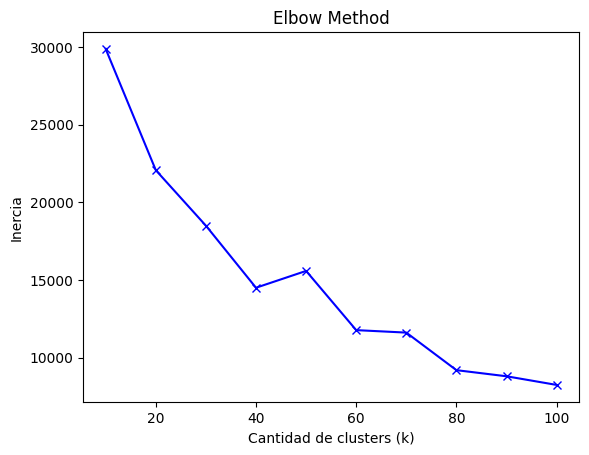

In [48]:
import kmeans as km

chosen_song = df_user[(df['name'] == 'Mamma Mia') & (df['artist'] == 'ABBA')]

k = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
valores_de_inercia = []
for i in k:
    using_kmeans = km.Kmeans(df_user, i, 0.001)
    clusters = using_kmeans.clustering(1000)
    valores_de_inercia.append(using_kmeans.get_inertia(clusters))

plt.plot(k, valores_de_inercia, 'bx-')
plt.xlabel('Cantidad de clusters (k)')
plt.ylabel('Inercia')
plt.title('Elbow Method')

In [49]:
using_kmeans = km.Kmeans(df_user, 60, 0.001)
clusters = using_kmeans.clustering(1000)

df_user['name'] = df['name']
df_user['artist'] = df['artist']

# saber cluster al que pertenece cada canción
df_user['cluster'] = clusters

chosen_song_cluster = df_user[(df['name'] == 'Mamma Mia') & (df['artist'] == 'ABBA')]['cluster'].values[0]
# get all the songs from the same cluster
songs_from_cluster = df_user[df_user['cluster'] == chosen_song_cluster][['name', 'artist']]
songs_from_cluster['acousticness'] = df['acousticness']
songs_from_cluster['danceability'] = df['danceability']
songs_from_cluster['energy'] = df['energy']
songs_from_cluster['key'] = df['key']
songs_from_cluster['mode'] = df['mode']
songs_from_cluster['speechiness'] = df['speechiness']
songs_from_cluster['instrumentalness'] = df['instrumentalness']
songs_from_cluster['liveness'] = df['liveness']
songs_from_cluster['loudness'] = df['loudness']
songs_from_cluster['tempo'] = df['tempo']
songs_from_cluster['valence'] = df['valence']

In [50]:
songs_from_cluster

,name,artist,acousticness,danceability,energy,key,mode,speechiness,instrumentalness,liveness,loudness,tempo,valence
38,I’m Just Ken (From Barbie The Album),Ryan Gosling,0.026400,0.352,0.628,1,1,0.0428,0.000047,0.0952,-6.259,140.431,0.3870
42,vampire,Olivia Rodrigo,0.169000,0.511,0.532,5,1,0.0560,0.000000,0.3110,-5.745,137.827,0.3220
52,Never Ending Song,Conan Gray,0.004860,0.580,0.790,2,1,0.0329,0.000096,0.3220,-6.575,141.912,0.5670
55,Cuídate,La Oreja de Van Gogh,0.306000,0.662,0.798,8,1,0.0335,0.000000,0.1740,-4.627,141.007,0.5420
59,Nonsense,Sabrina Carpenter,0.026800,0.740,0.697,8,1,0.0340,0.000000,0.2240,-4.912,138.992,0.7320
81,Transgender,Crystal Castles,0.000164,0.522,0.914,7,1,0.0379,0.846000,0.2400,-8.285,137.954,0.0364
106,Traveling,The Main Ingredient,0.845000,0.591,0.548,5,0,0.0289,0.091200,0.1610,-7.001,138.178,0.5980
116,Crazy Train,Ozzy Osbourne,0.408000,0.454,0.913,9,1,0.1070,0.000271,0.2480,-4.008,137.688,0.5210
162,여우 같은 내 친구 (No More),f(x),0.459000,0.738,0.879,7,1,0.0599,0.000000,0.2060,-2.771,135.028,0.8300
170,Easy On Me,Adele,0.578000,0.604,0.366,5,1,0.0282,0.000000,0.1330,-7.519,141.981,0.1300


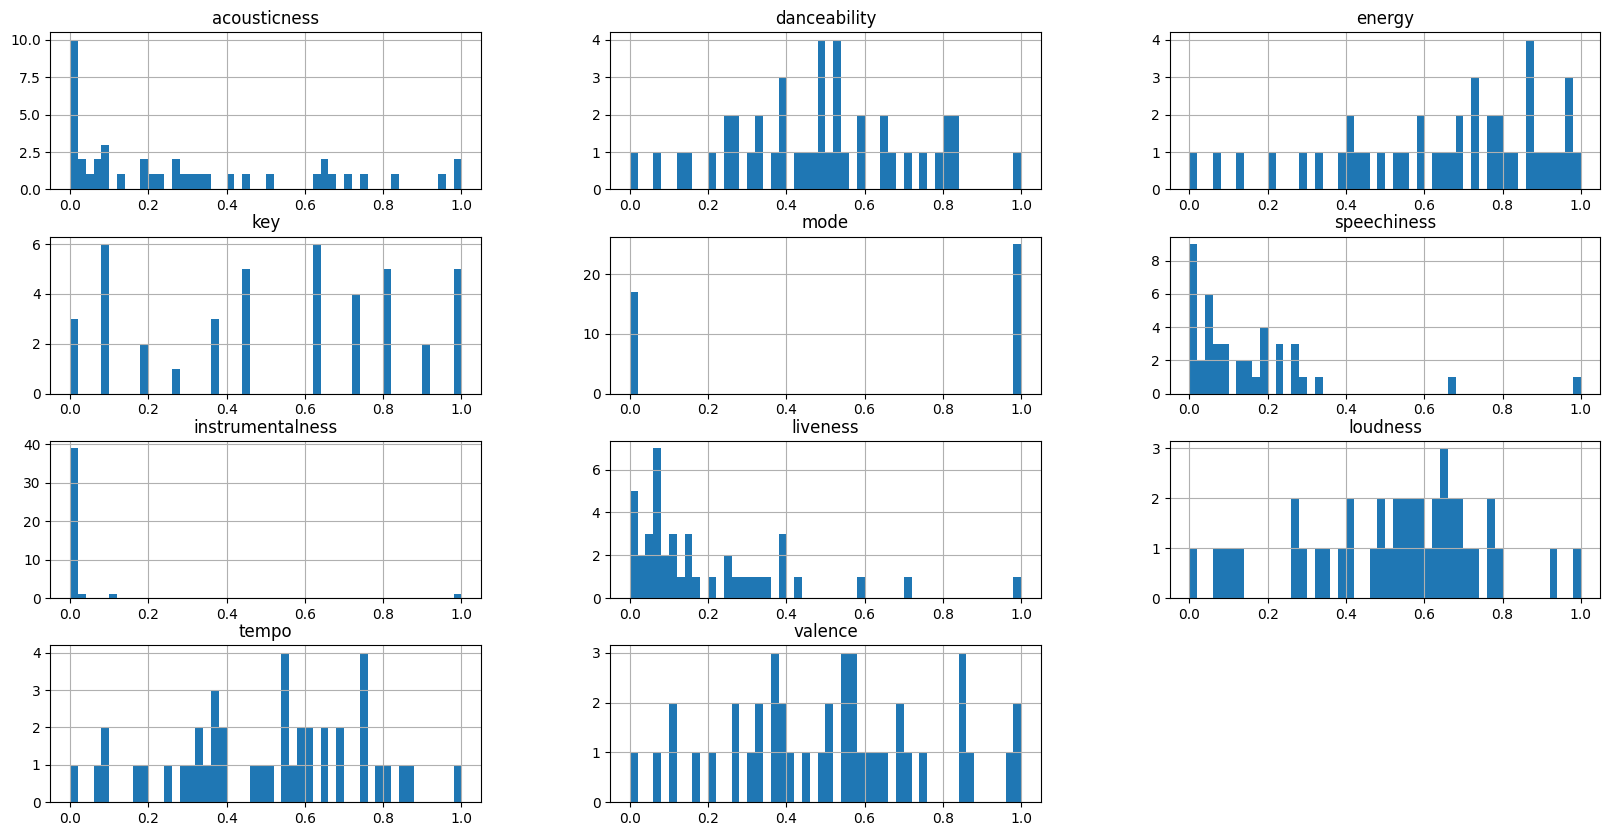

In [51]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Assuming songs_from_cluster is your original DataFrame
to_cluster = ['acousticness', 'danceability', 'energy', 'key',
              'mode', 'speechiness',
              'instrumentalness', 'liveness', 'loudness',
              'tempo', 'valence']

# Create a copy of the DataFrame
df_user_normalized = songs_from_cluster.copy()

# Extract the subset of columns for normalization
subset_for_normalization = df_user_normalized[to_cluster]

# Normalize the subset of columns
mm = MinMaxScaler()
normalized_values = mm.fit_transform(subset_for_normalization)

# Create a new DataFrame with the normalized values
df_user_normalized[to_cluster] = normalized_values

# Include 'name' and 'artist' columns
df_user_normalized['name'] = songs_from_cluster['name']
df_user_normalized['artist'] = songs_from_cluster['artist']

# Plot histograms
df_user_normalized[to_cluster].hist(bins=50, figsize=(20, 10))
plt.show()

In [52]:
df_user_normalized

,name,artist,acousticness,danceability,energy,key,mode,speechiness,instrumentalness,liveness,loudness,tempo,valence
38,I’m Just Ken (From Barbie The Album),Ryan Gosling,0.029517,0.063098,0.528875,0.090909,1.0,0.128763,0.000056,0.045857,0.507767,0.603053,0.375536
42,vampire,Olivia Rodrigo,0.189395,0.367113,0.382979,0.454545,1.0,0.239130,0.000000,0.381315,0.570146,0.348209,0.305913
52,Never Ending Song,Conan Gray,0.005367,0.499044,0.775076,0.181818,1.0,0.045987,0.000114,0.398414,0.469417,0.747994,0.568338
55,Cuídate,La Oreja de Van Gogh,0.342995,0.655832,0.787234,0.727273,1.0,0.051003,0.000000,0.168351,0.705825,0.659425,0.541560
59,Nonsense,Sabrina Carpenter,0.029965,0.804971,0.633739,0.727273,1.0,0.055184,0.000000,0.246075,0.671238,0.462224,0.745073
81,Transgender,Crystal Castles,0.000102,0.388145,0.963526,0.636364,1.0,0.087793,1.000000,0.270947,0.261893,0.360638,0.000000
106,Traveling,The Main Ingredient,0.947305,0.520076,0.407295,0.454545,0.0,0.012542,0.107801,0.148142,0.417718,0.382560,0.601542
116,Crazy Train,Ozzy Osbourne,0.457355,0.258126,0.962006,0.818182,1.0,0.665552,0.000320,0.283383,0.780947,0.334606,0.519066
162,여우 같은 내 친구 (No More),f(x),0.514534,0.801147,0.910334,0.636364,1.0,0.271739,0.000000,0.218094,0.931068,0.074281,0.850043
170,Easy On Me,Adele,0.647953,0.544933,0.130699,0.454545,1.0,0.006689,0.000000,0.104617,0.354854,0.754747,0.100257


In [53]:
from sklearn.neighbors import NearestNeighbors

## Datos normalizados
model_knn = NearestNeighbors(n_neighbors = 5, metric = 'euclidean', algorithm='brute').fit(user_normalized)

selected_song = df_user_normalized[(df['name'] == 'Mamma Mia') & (df['artist'] == 'ABBA')]
selected_song_features = selected_song[['acousticness', 'danceability', 'energy', 'key',
                            'mode', 'speechiness',
                            'instrumentalness','liveness','loudness',
                            'tempo', 'valence']].values
selected_song = mm.transform(selected_song_features)

distances, indices = model_knn.kneighbors(selected_song)
recommended_songs = df.iloc[indices[0]][['name', 'artist']].to_dict(orient = 'records')

for song, distance in zip(recommended_songs, distances[0]):
    print(f"{song['name']} by {song['artist']} - {distance}")

So-so by Baek A Yeon - 13.200138264492262
All with You by TAEYEON - 13.205909264202873
1950 by King Princess - 13.225697250750452
El Farolito by Voz Veis - 13.23117859048262
Culpable O No - Miénteme Como Siempre by Luis Miguel - 13.233221367846008


C:\Users\yop\AppData\Local\Temp\ipykernel_23180\352917964.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  selected_song = df_user_normalized[(df['name'] == 'Mamma Mia') & (df['artist'] == 'ABBA')]
c:\Users\yop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
